In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

C:\Users\dsant\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\dsant\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
C:\Users\dsant\AppData\Local\Temp\ipykernel_14036\3211880460.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
imoveis = pd.read_excel("imoveis.xlsx")

In [3]:
imoveis.head()

,area,preco
0,359.87,25000
1,353.12,45000
2,341.89,45000
3,435.99,20000
4,341.77,25000


Analise de Dados exploratória

In [5]:
imoveis.describe() # analisar dados (estatistica)

,area,preco
count,54.000000,54.000000
mean,457.483519,41296.296296
std,261.527053,16488.566227
min,293.220000,20000.000000
25%,355.087500,30000.000000
50%,380.360000,40000.000000
75%,470.087500,50000.000000
max,2057.570000,120000.000000


In [6]:
imoveis.info() # verificando se temos nulos e tipo dos dados

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   area    54 non-null     float64
 1   preco   54 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 992.0 bytes


<AxesSubplot:xlabel='area', ylabel='Count'>

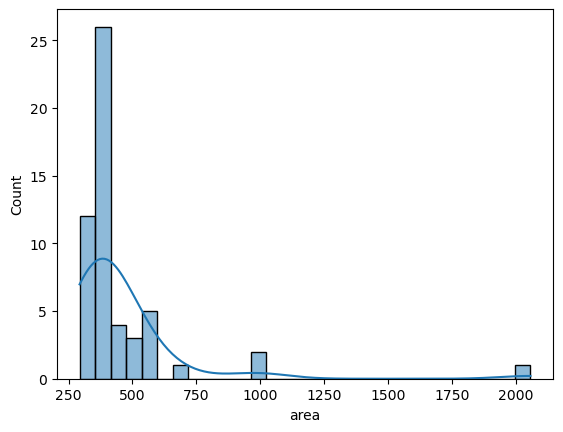

In [7]:
sns.histplot(imoveis, x="area", kde=True) # não é uma distribuição normal

<AxesSubplot:xlabel='preco', ylabel='Count'>

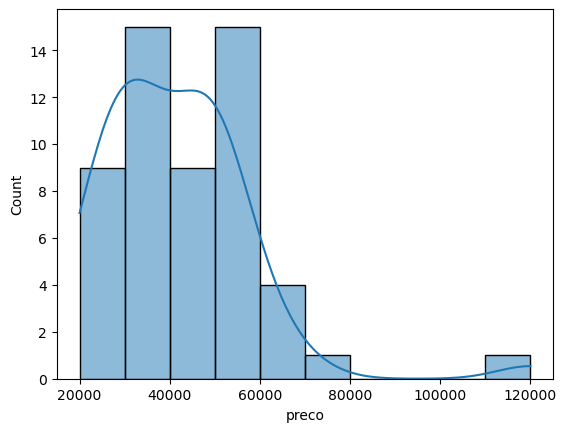

In [9]:
sns.histplot(imoveis, x="preco", kde=True) # se parece mais com uma distribuição normal

In [10]:
 imoveis.corr() #não é uma correlação forte

,area,preco
area,1.000000,0.511373
preco,0.511373,1.000000


<AxesSubplot:xlabel='area', ylabel='preco'>

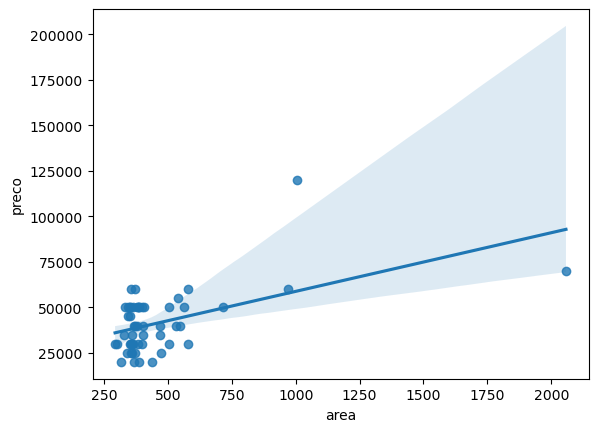

In [11]:
sns.regplot(x="area", y="preco", data=imoveis) #visualizar a relação de correlação enter preço e area

In [12]:
imoveis.describe() #notamos a dispcrepancia entre os valores da area e preco o que tras problemas para o modelo

,area,preco
count,54.000000,54.000000
mean,457.483519,41296.296296
std,261.527053,16488.566227
min,293.220000,20000.000000
25%,355.087500,30000.000000
50%,380.360000,40000.000000
75%,470.087500,50000.000000
max,2057.570000,120000.000000


## Normalização

In [13]:
from sklearn.preprocessing import MinMaxScaler

In [15]:
scaler = MinMaxScaler()  # Instantiate MinMaxScaler object with ()

imovel_norm = pd.DataFrame(scaler.fit_transform(imoveis), index=imoveis.index, columns=imoveis.columns)

In [16]:

imovel_norm.head()

,area,preco
0,0.037776,0.05
1,0.033950,0.25
2,0.027585,0.25
3,0.080919,0.00
4,0.027517,0.05


In [18]:
imovel_norm.describe() 

,area,preco
count,54.000000,54.000000
mean,0.093101,0.212963
std,0.148229,0.164886
min,0.000000,0.000000
25%,0.035065,0.100000
50%,0.049389,0.200000
75%,0.100245,0.300000
max,1.000000,1.000000


<AxesSubplot:xlabel='area', ylabel='preco'>

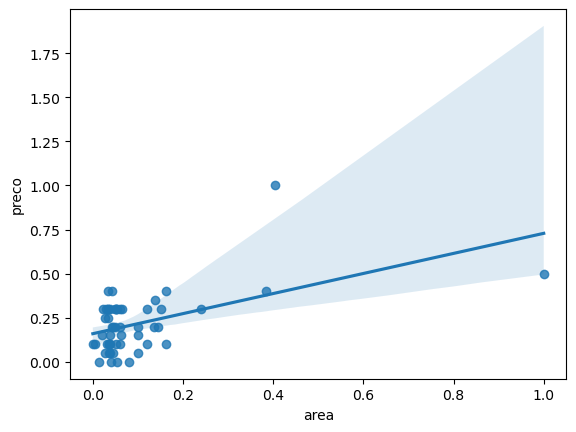

In [19]:
sns.regplot(x="area", y="preco", data=imovel_norm) # mesmo grafico com a normalização

In [20]:
import statsmodels.formula.api as smf

In [26]:
function = "preco~area"
model = smf.ols(formula=function, data=imovel_norm).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  preco   R-squared:                       0.262
Model:                            OLS   Adj. R-squared:                  0.247
Method:                 Least Squares   F-statistic:                     18.41
Date:                Mon, 05 Feb 2024   Prob (F-statistic):           7.76e-05
Time:                        12:13:21   Log-Likelihood:                 29.402
No. Observations:                  54   AIC:                            -54.80
Df Residuals:                      52   BIC:                            -50.83
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.1600      0.023      6.942      0.0

## Treinar o Modelo de Machine Learn

In [28]:
x = imovel_norm [["area"]]
y = imovel_norm [["preco"]]

#### Treino do treino

In [33]:
# divide as amostras x e y / define o tamnho do teste 20% / aplica um random para pegar amostras aleatorias (42)
x_treino, x_teste, y_treino, y_teste = train_test_split(x,y, test_size=0.2, random_state=42) 

lr = LinearRegression() #inicializa o Linear Regression

lr.fit(x_treino, y_treino)

LinearRegression()

x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size=0.2, random_state=42)

Esta linha usa a train_test_splitfunção do sklearn.model_selectionmódulo para dividir seus dados ( xe y) em conjuntos de treinamento e teste.
xrepresenta os recursos ou variáveis ​​independentes e yrepresenta a variável de destino ou variável dependente.
test_size=0.2especifica que 20% dos dados serão reservados para teste, enquanto os 80% restantes serão usados ​​para treinamento.
random_state=42define a semente aleatória para garantir a reprodutibilidade. A mesma semente aleatória sempre produzirá a mesma divisão, o que é útil para depuração e obtenção de resultados consistentes.
lr = LinearRegression()

Esta linha inicializa um modelo de regressão linear.
LinearRegression()é uma classe do sklearn.linear_modelmódulo. Representa um modelo de regressão linear que ajusta uma relação linear entre as variáveis ​​independentes ( x) e a variável dependente ( y).
lr.fit(x_treino, y_treino)

Esta linha ajusta (treina) o modelo de regressão linear usando os dados de treinamento.

In [35]:
r_sq = lr.score(x_treino,y_treino)
print(r_sq) # R-Quadrado

0.2754399686961231


In [37]:
y_pred_treino = lr.predict(x_treino)
print("MAE:", metrics.mean_absolute_error(y_treino, y_pred_treino))
print("MSE:", metrics.mean_squared_error(y_treino, y_pred_treino))
print("RMSE:", np.sqrt(metrics.mean_squared_error(y_treino, y_pred_treino)))

MAE: 0.1068423059800295
MSE: 0.01998711973859072
RMSE: 0.14137581030215432


#### Treino do Teste

In [38]:
lr.fit(x_teste, y_teste)

LinearRegression()

In [46]:
y_pred_teste = lr.predict(x_teste)

In [47]:
y_pred_teste = lr.predict(x_teste)
print("MAE:", metrics.mean_absolute_error(y_teste, y_pred_teste))
print("MSE:", metrics.mean_squared_error(y_teste, y_pred_teste))
print("RMSE:", np.sqrt(metrics.mean_squared_error(y_teste, y_pred_teste)))

MAE: 0.10852020952335328
MSE: 0.01746864564020875
RMSE: 0.13216900408268478
